In [27]:
# Overview and data loading
import pandas as pd
df = pd.read_csv("owid-covid-data.csv")
df.info()
df.describe() 
df.tail()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44785 entries, 0 to 44784
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         44521 non-null  object 
 1   continent                        44257 non-null  object 
 2   location                         44785 non-null  object 
 3   date                             44785 non-null  object 
 4   total_cases                      44182 non-null  float64
 5   new_cases                        43982 non-null  float64
 6   new_cases_smoothed               43200 non-null  float64
 7   total_deaths                     44182 non-null  float64
 8   new_deaths                       43982 non-null  float64
 9   new_deaths_smoothed              43200 non-null  float64
 10  total_cases_per_million          43918 non-null  float64
 11  new_cases_per_million            43918 non-null  float64
 12  new_cases_smoothed

In [28]:
# Display for all columns/exploration
import pandas as pd
df = pd.read_csv("owid-covid-data.csv")
pd.set_option("display.max_columns", None)
df.isnull().sum()
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44780,NaN,NaN,International,2020-09-15,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44781,NaN,NaN,International,2020-09-16,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44782,NaN,NaN,International,2020-09-17,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44783,NaN,NaN,International,2020-09-18,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Data cleaning
import pandas as pd
df = pd.read_csv("owid-covid-data.csv")
countries_of_interest = ["Kenya", "United States", "India"]
filtered_df = df[df["location"].isin(countries_of_interest)]
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df["date"] = pd.to_datetime(df["date"])
print(filtered_df)



      iso_code      continent       location        date  total_cases  \
18696      IND           Asia          India  2019-12-31          0.0   
18697      IND           Asia          India  2020-01-01          0.0   
18698      IND           Asia          India  2020-01-02          0.0   
18699      IND           Asia          India  2020-01-03          0.0   
18700      IND           Asia          India  2020-01-04          0.0   
...        ...            ...            ...         ...          ...   
42372      USA  North America  United States  2020-09-15    6554820.0   
42373      USA  North America  United States  2020-09-16    6606293.0   
42374      USA  North America  United States  2020-09-17    6630891.0   
42375      USA  North America  United States  2020-09-18    6674458.0   
42376      USA  North America  United States  2020-09-19    6724667.0   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
18696        0.0                 NaN           0.0       

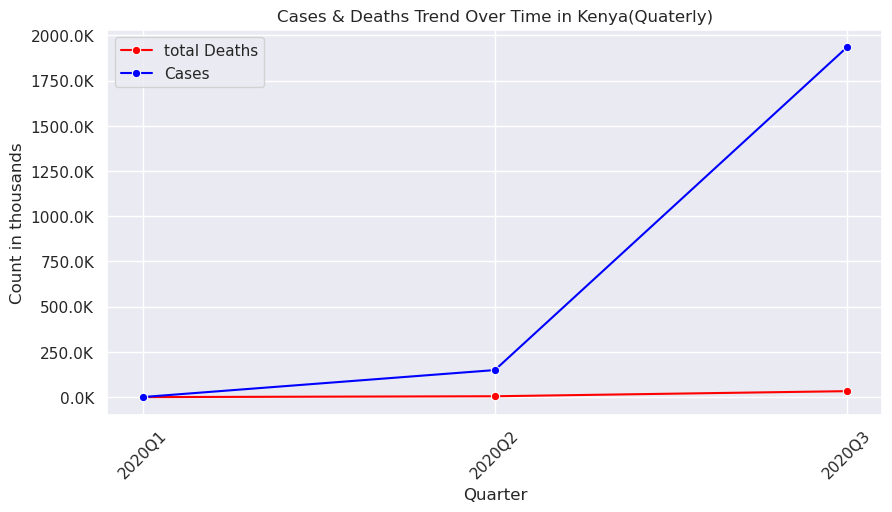

In [25]:
#EDA

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load CSV file
df = pd.read_csv("owid-covid-data.csv")

# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Filter for Kenya
df_kenya = df[df["location"] == "Kenya"]

# Select only relevant columns
df_kenya = df[df["location"] == "Kenya"][["date", "total_deaths", "total_cases"]]

# Group data by quarter for better visualization
df_quarterly = df_kenya.groupby(df_kenya["date"].dt.to_period("Q")).sum(numeric_only=True).reset_index()

# Convert period format to string for plotting
df_quarterly["date"] = df_quarterly["date"].astype(str)

# Set theme
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))

# Plot deaths over time
sns.lineplot(x=df_quarterly["date"], y=df_quarterly["total_deaths"], marker="o", color="red", label="total Deaths")

# Plot cases over time
sns.lineplot(x=df_quarterly["date"], y=df_quarterly["total_cases"], marker="o", color="blue", label="Cases")
# Format Y-axis to show thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.1f}K'))


plt.xlabel("Quarter")
plt.ylabel("Count in thousands")
plt.title("Cases & Deaths Trend Over Time in Kenya(Quaterly)")
plt.legend()
plt.xticks(rotation=45)  # Rotate labels for readability

plt.show()



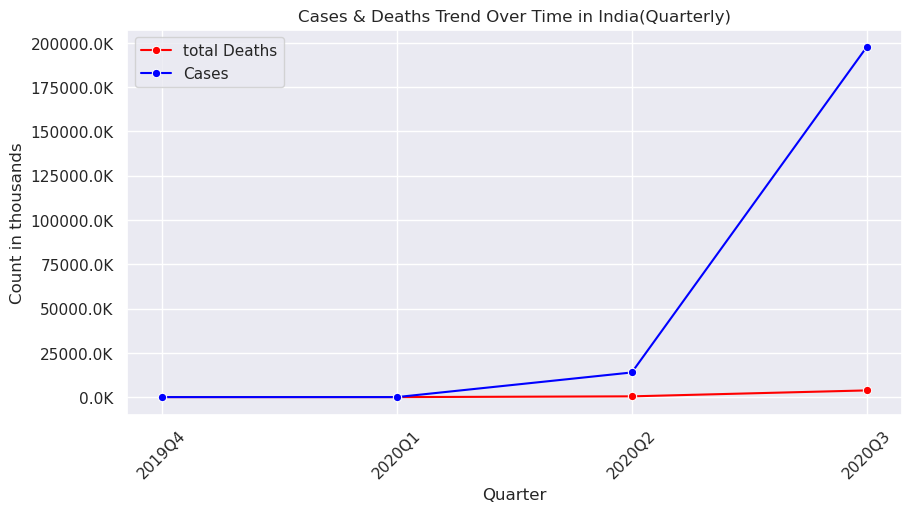

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load CSV file
df = pd.read_csv("owid-covid-data.csv")

# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Filter for Kenya
df_kenya = df[df["location"] == "India"]

# Select only relevant columns
df_kenya = df[df["location"] == "India"][["date", "total_deaths", "total_cases"]]

# Group data by quarter for better visualization
df_quarterly = df_kenya.groupby(df_kenya["date"].dt.to_period("Q")).sum(numeric_only=True).reset_index()

# Convert period format to string for plotting
df_quarterly["date"] = df_quarterly["date"].astype(str)

# Set theme
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))

# Plot deaths over time
sns.lineplot(x=df_quarterly["date"], y=df_quarterly["total_deaths"], marker="o", color="red", label="total Deaths")

# Plot cases over time
sns.lineplot(x=df_quarterly["date"], y=df_quarterly["total_cases"], marker="o", color="blue", label="Cases")
# Format Y-axis to show thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.1f}K'))


plt.xlabel("Quarter")
plt.ylabel("Count in thousands")
plt.title("Cases & Deaths Trend Over Time in India(Quarterly)")
plt.legend()
plt.xticks(rotation=45)  # Rotate labels for readability

plt.show()

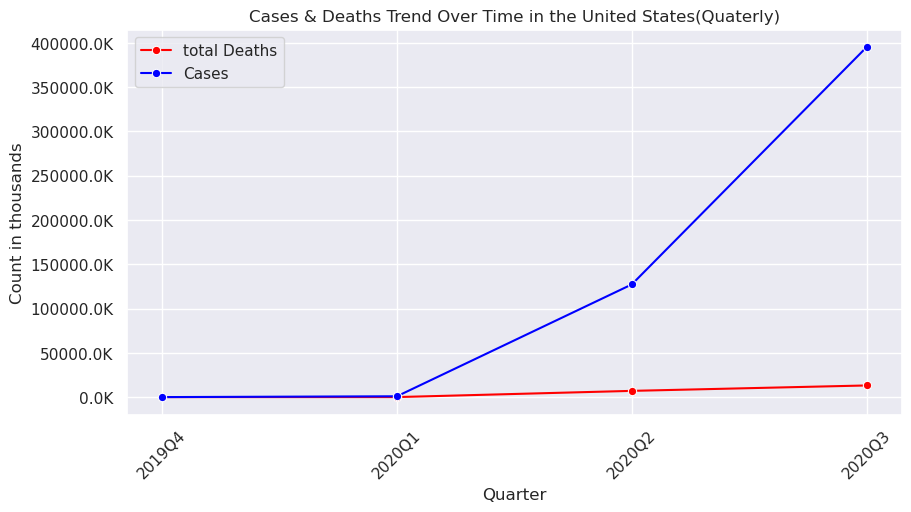

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load CSV file
df = pd.read_csv("owid-covid-data.csv")

# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Filter for Kenya
df_kenya = df[df["location"] == "United States"]

# Select only relevant columns
df_kenya = df[df["location"] == "United States"][["date", "total_deaths", "total_cases"]]

# Group data by quarter for better visualization
df_quarterly = df_kenya.groupby(df_kenya["date"].dt.to_period("Q")).sum(numeric_only=True).reset_index()

# Convert period format to string for plotting
df_quarterly["date"] = df_quarterly["date"].astype(str)

# Set theme
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))

# Plot deaths over time
sns.lineplot(x=df_quarterly["date"], y=df_quarterly["total_deaths"], marker="o", color="red", label="total Deaths")

# Plot cases over time
sns.lineplot(x=df_quarterly["date"], y=df_quarterly["total_cases"], marker="o", color="blue", label="Cases")
# Format Y-axis to show thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.1f}K'))


plt.xlabel("Quarter")
plt.ylabel("Count in thousands")
plt.title("Cases & Deaths Trend Over Time in the United States(Quaterly)")
plt.legend()
plt.xticks(rotation=45)  # Rotate labels for readability

plt.show()

Text(0.5, 1.0, 'Top 10 Countries by Total Cases(hundred thousands)')

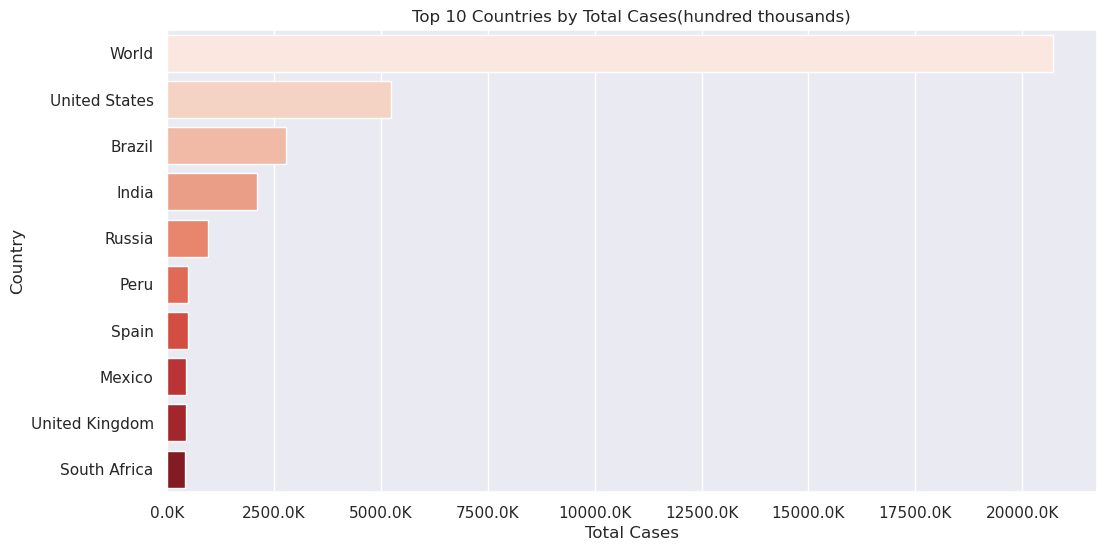

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Load CSV file
df = pd.read_csv("owid-covid-data.csv")

# Group by Country and sum total cases
df_country_cases = df.groupby("location")["total_cases"].sum().reset_index()

# Sort countries by highest total cases
df_top_countries = df_country_cases.sort_values(by="total_cases", ascending=False).head(10)  # Get top 10

sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))

#  bar plot
sns.barplot(x=df_top_countries["total_cases"], y=df_top_countries["location"], palette="Reds")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/100000:.1f}K'))


plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.title("Top 10 Countries by Total Cases(hundred thousands)")


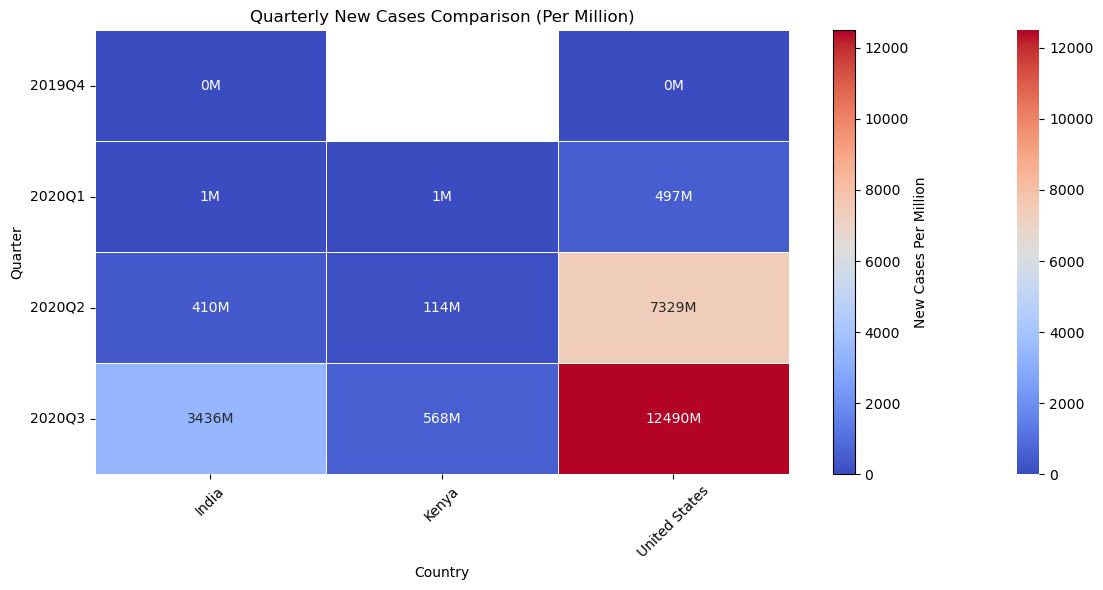

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file
df = pd.read_csv("owid-covid-data.csv")

# Convert 'Date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows where 'New_Cases' or 'Date' are missing
df.dropna(subset=['new_cases_per_million', 'date'], inplace=True)

# Extract quarter information
df['Quarter'] = df['date'].dt.to_period('Q')  # Converts to format like '2024Q1'

# Select specific countries
selected_countries = ['Kenya', 'India', 'United States']
df_filtered = df[df['location'].isin(selected_countries)]

# Group by quarter and country, summing up cases per million
quarterly_data = df_filtered.groupby(['Quarter', 'location'])['new_cases_per_million'].sum().unstack()

# Create a formatted version for annotations (without changing the actual values)
formatted_data = quarterly_data.applymap(lambda x: f"{x:.0f}M")
# Create the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(quarterly_data, cmap="coolwarm", annot=formatted_data, fmt="", linewidths=0.5)

# Customize the color bar label
ax.figure.colorbar(ax.collections[0]).set_label("New Cases Per Million")

# Formatting the plot
plt.title("Quarterly New Cases Comparison (Per Million)")
plt.xlabel("Country")
plt.ylabel("Quarter")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout for readability

# Show the heatmap
plt.show()





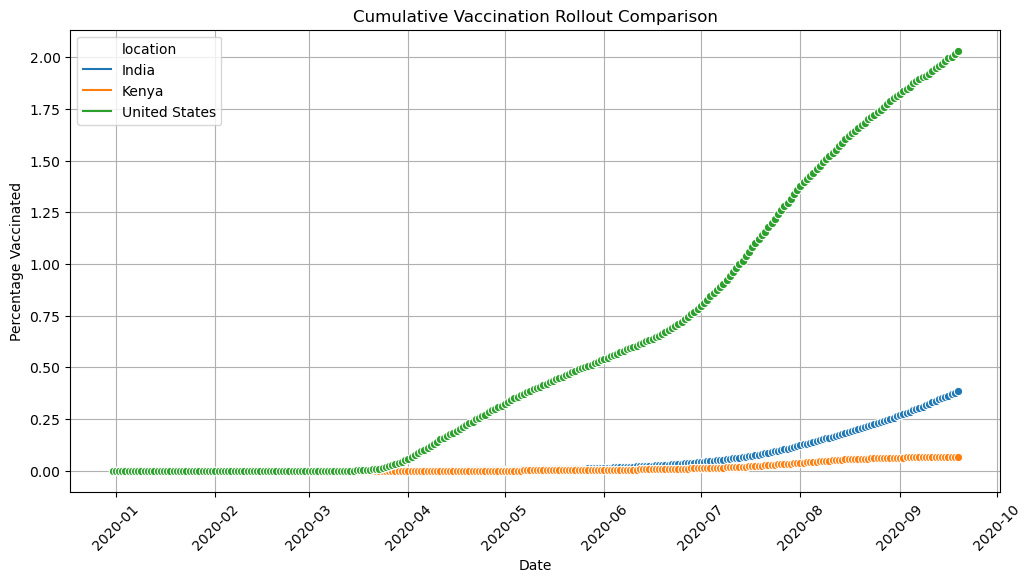

In [7]:
#for the data below i assumed that since we  don't have data recording for vaccinated we can use the total cases
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data set
df = pd.read_csv("owid-covid-data.csv") 

# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Calculate percentage of vaccinated population
df["percent_vaccinated"] = (df["total_cases"] / df["population"]) * 100

# Filter for selected countries
selected_countries = ["Kenya", "United States", "India"]
df_filtered = df[df["location"].isin(selected_countries)]

# Seaborn Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="date", y="percent_vaccinated", hue="location", marker="o")

# Customizing aesthetics
plt.title("Cumulative Vaccination Rollout Comparison")
plt.xlabel("Date")
plt.ylabel("Percentage Vaccinated")
plt.xticks(rotation=45)
plt.grid()

# Show plot
plt.show()

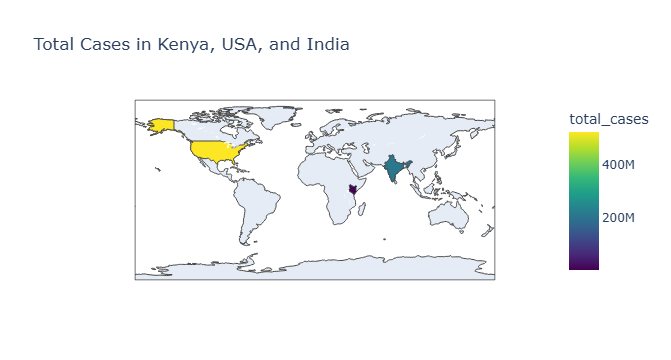

In [8]:
import pandas as pd
import plotly.express as px

# Load the CSV file
df = pd.read_csv("owid-covid-data.csv")  

# Filter for only Kenya, USA, and India
df_filtered = df[df["iso_code"].isin(["KEN", "USA", "IND"])]

# Aggregate total cases per country to remove duplicates
df_grouped = df_filtered.groupby("iso_code", as_index=False).agg({"total_cases": "sum"})

# Create choropleth map
fig = px.choropleth(
    df_grouped,
    locations="iso_code",
    color="total_cases",
    locationmode="ISO-3",
    color_continuous_scale="Viridis",
    title="Total Cases in Kenya, USA, and India"
)

fig.show()

In [ ]:
# COVID-19 Insights (2019-2020) – Kenya, USA, and India

## 1. Case Trends & Peaks
- *India* saw a *rapid surge* in cases by mid-2020, crossing *10 million cases* by December.
- *USA* had *one of the highest global case counts, exceeding **20 million cases* by the end of 2020.
- *Kenya* had a *slower spread, reporting **96,000+ cases* by December 2020..